<a href="https://colab.research.google.com/github/mahii6991/ML-Notebooks/blob/main/KTP_ship_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis

* Columns in the dataset

ship_name,
Imo_number (unique for each ship),
mmsi,
ship_status (In service),
ship_type (some common ones are: 'Container Ship (Fully Cellular)', 'General Cargo Ship', 'Bulk
Carrier', 'Passenger Ship', 'Products Tanker', 'Chemical/Products Tanker', 'Fishing Vessel', 'Chemical
Tanker', 'Ro-Ro Cargo Ship', 'Crude Oil Tanker' )
Flag_name (country name: China, Panama, etc)
entered (port entry timestamp in UTC)
departed (port departure timestamp in UTC)
latitude,
longitude,
port_name,
port_country_name,
port_code,
status (moored, At anchor, could be empty/null)
hours_in_port,
gross_tonnage,
length_overall_loa,
draught,
breadth.

* Target Variable - hours_in_port

In [1]:
import pandas as pd
import numpy as np

In [2]:
port_call = pd.read_csv('/content/port_calls_prod_60_6.csv',encoding='latin-1')

In [3]:
port_call.head()

,ship_name,imo_number,mmsi,ship_status,ship_type,flag_name,entered,departed,latitude,longitude,port_name,port_country_name,port_code,status,hours_in_port,gross_tonnage,length_overall_loa,draught,breadth
0,FLEURTJE,1001702,373602000.0,In Service/Commission,Yacht (Sailing),Panama,2021-08-26T04:16:17Z,NaN,37.971436,-0.684088,Torrevieja,Spain,ESTOR,Moored,NaN,295.0,52.06,4.63,8.57
1,FLEURTJE,1001702,373602000.0,In Service/Commission,Yacht (Sailing),Panama,2021-08-20T23:55:04Z,2021-08-25T09:36:47Z,38.744904,1.423552,La Savina,Spain,ESCBS,At anchor,105.7,295.0,52.06,4.63,8.57
2,FLEURTJE,1001702,373602000.0,In Service/Commission,Yacht (Sailing),Panama,2021-08-11T17:31:48Z,2021-08-12T09:36:05Z,38.989326,9.023798,Sarroch,Italy,ITPFX,At anchor,16.1,295.0,52.06,4.63,8.57
3,FLEURTJE,1001702,373602000.0,In Service/Commission,Yacht (Sailing),Panama,2021-08-10T08:11:41Z,2021-08-10T09:18:30Z,40.696091,14.475155,Castellammare di Stabia,Italy,ITCAS,NaN,1.1,295.0,52.06,4.63,8.57
4,FLEURTJE,1001702,373602000.0,In Service/Commission,Yacht (Sailing),Panama,2021-07-31T14:38:10Z,2021-08-10T06:39:07Z,40.694996,14.476230,Castellammare di Stabia,Italy,ITCAS,Moored,232.0,295.0,52.06,4.63,8.57


In [4]:
port_call.shape

(21016, 19)

In [5]:
port_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21016 entries, 0 to 21015
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ship_name           21016 non-null  object 
 1   imo_number          21016 non-null  int64  
 2   mmsi                19164 non-null  float64
 3   ship_status         21016 non-null  object 
 4   ship_type           21016 non-null  object 
 5   flag_name           21016 non-null  object 
 6   entered             21016 non-null  object 
 7   departed            20959 non-null  object 
 8   latitude            21016 non-null  float64
 9   longitude           21016 non-null  float64
 10  port_name           21016 non-null  object 
 11  port_country_name   21016 non-null  object 
 12  port_code           21015 non-null  object 
 13  status              7392 non-null   object 
 14  hours_in_port       20958 non-null  float64
 15  gross_tonnage       21015 non-null  float64
 16  leng

In [6]:
missing_percentage = port_call.isnull().sum() / len(port_call) * 100
print(missing_percentage)

ship_name              0.000000
imo_number             0.000000
mmsi                   8.812333
ship_status            0.000000
ship_type              0.000000
flag_name              0.000000
entered                0.000000
departed               0.271222
latitude               0.000000
longitude              0.000000
port_name              0.000000
port_country_name      0.000000
port_code              0.004758
status                64.826799
hours_in_port          0.275980
gross_tonnage          0.004758
length_overall_loa     0.004758
draught                0.004758
breadth                0.004758
dtype: float64


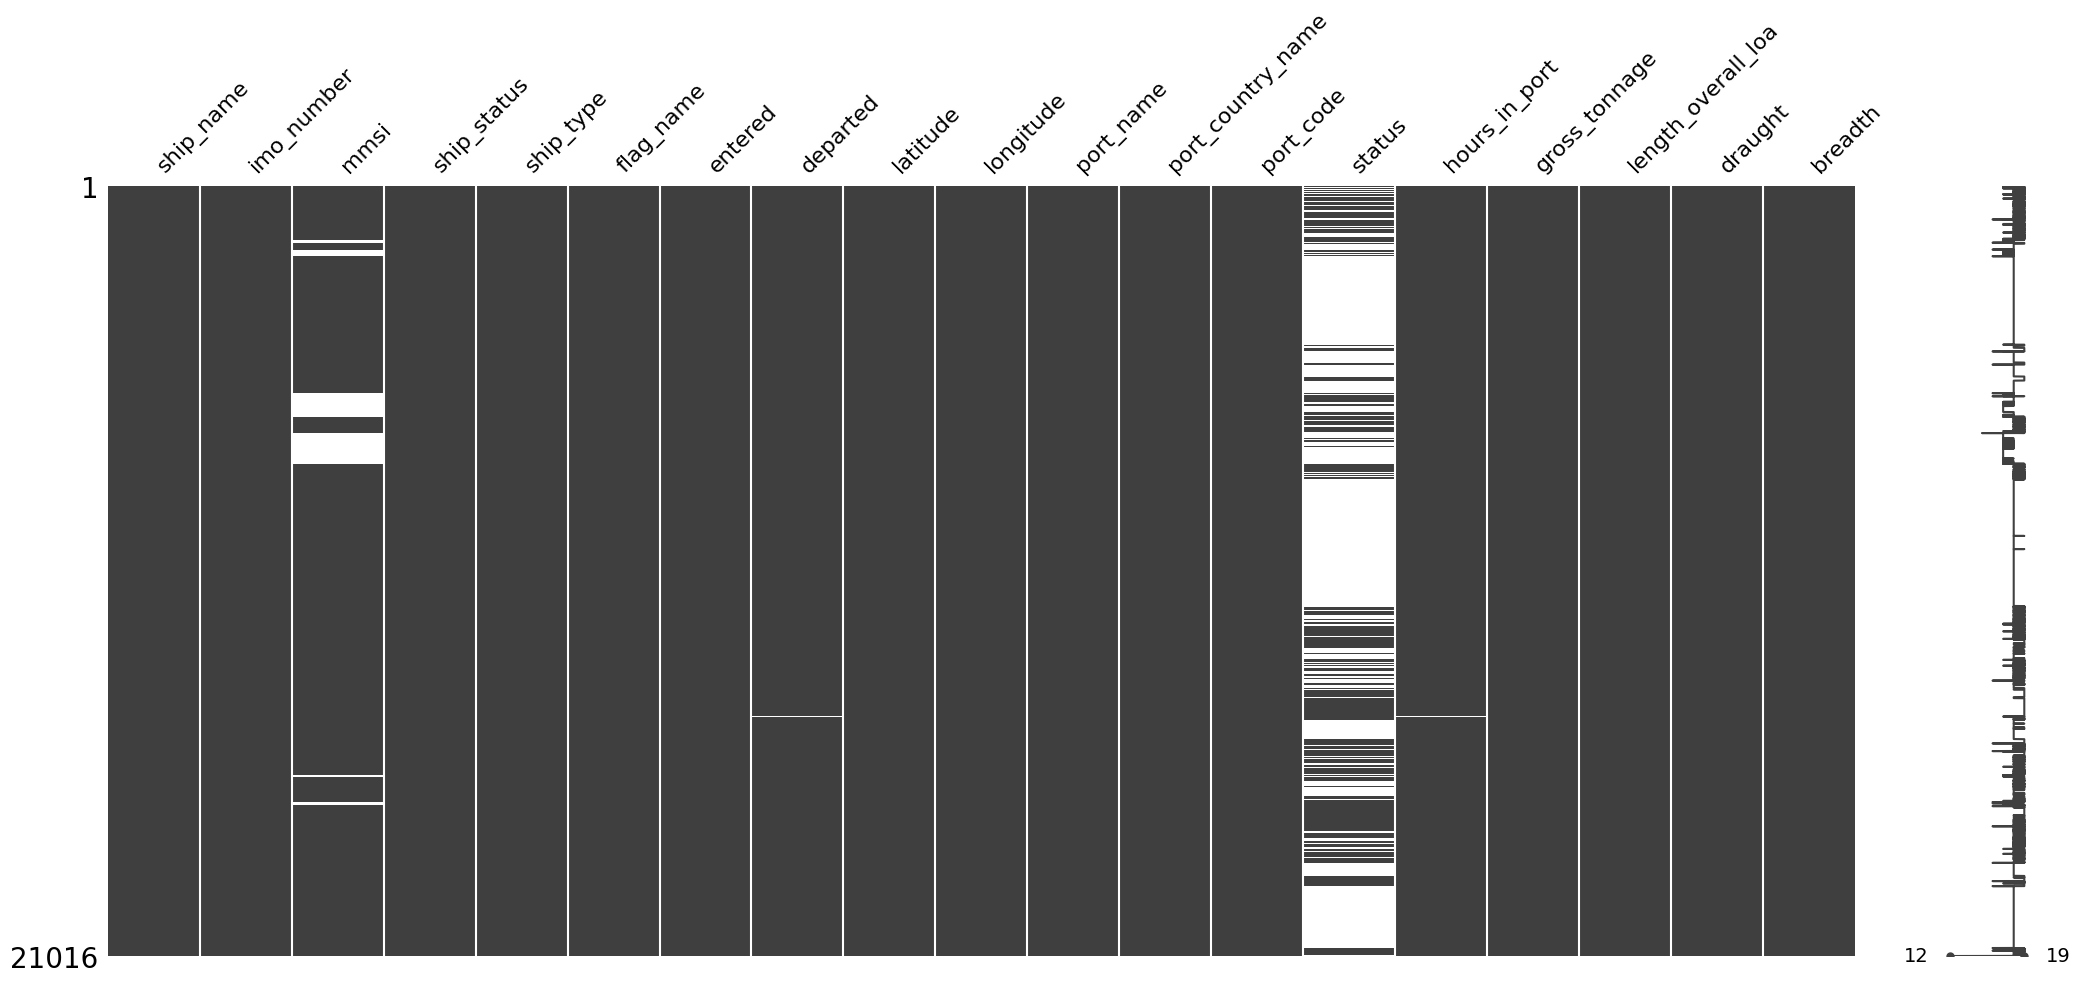

In [7]:
#importing necessary modules to look out for the vizualization
import missingno as msno
import matplotlib.pyplot as plt
#forming a matrix for the vizualzation purpose
msno.matrix(port_call)
plt.show()

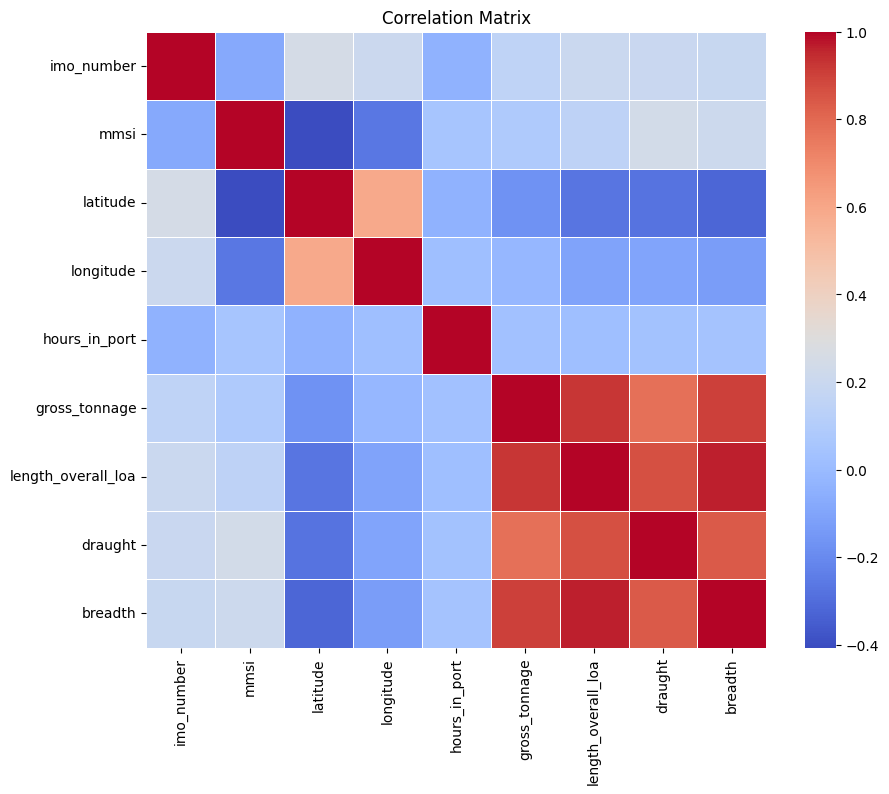

In [8]:
import seaborn as sns
# Compute the correlation matrix
correlation_matrix = port_call.corr(numeric_only=True)


# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Data Exploration.

Here we are answering two question in our dataset

* Compute mean hours_in_port for all dataset (5 marks?)
* Which port is most visited in the dataset (5 marks?)

Answer's for the above two question in the form of output.

In [9]:
# Compute the mean hours_in_port
mean_hours_in_port = port_call['hours_in_port'].mean()

# Find the most visited port
most_visited_port = port_call['port_name'].value_counts().sort_values(ascending=False).index[0]

# Print the results
print(f'Mean hours_in_port: {mean_hours_in_port}')
print(f'Most visited port: {most_visited_port}')

Mean hours_in_port: 61.56803130069663
Most visited port: Tuborg


* Compute mean, max and min hours_in_port for all ships entered US ports
(port_country_name=’United States of America’) (5 marks?)

Answer for the above question in the form of output.

In [10]:
# Select the rows where port_country_name is 'United States of America'
us_ports = port_call[port_call['port_country_name'] == 'United States of America']

# Calculate the mean, max and min hours_in_port
us_ports_stats = us_ports['hours_in_port'].agg([np.mean, np.max, np.min])

# Print the results
print(us_ports_stats)

mean     156.467399
amax    8582.300000
amin       0.100000
Name: hours_in_port, dtype: float64


*  How can we remove outliers from the dataset? (15 marks?)

It is generally recommended to analyze the outliers in both the target variable and predictor variables to determine their nature and potential impact on the analysis. Depending on the specific goals and requirements of our analysis, we can decide whether to remove outliers from the target variable, predictor variables, or both. It's important to consider the potential consequences of removing outliers, such as altering the data distribution or losing important information, and ensure that the chosen approach aligns with the goals and assumptions of your analysis.

In [11]:
import pandas as pd

# Assuming you have a dataframe called 'df'
categorical_columns = port_call.select_dtypes(include=['object'])

# Print the categorical columns
print(categorical_columns.columns)

Index(['ship_name', 'ship_status', 'ship_type', 'flag_name', 'entered',
       'departed', 'port_name', 'port_country_name', 'port_code', 'status'],
      dtype='object')


In [12]:
continuous_columns = port_call.drop(categorical_columns,axis=1)

In [13]:
continuous_columns.columns

Index(['imo_number', 'mmsi', 'latitude', 'longitude', 'hours_in_port',
       'gross_tonnage', 'length_overall_loa', 'draught', 'breadth'],
      dtype='object')

In [14]:
# Identify the continuous columns
continuous_columns = port_call.select_dtypes(include=np.number).columns

# Loop through the continuous columns and remove outliers using any desired method (e.g., Z-score)
for column in continuous_columns:
    z_scores = np.abs((port_call[column] - port_call[column].mean()) / port_call[column].std())
    threshold = 3  # Set the threshold value for outliers
    outliers = port_call[z_scores > threshold]
    port_call_out = port_call.drop(outliers.index)  # Remove the outliers from the DataFrame


* Before Outliers

In [15]:
port_call.shape

(21016, 19)

* After Outliers

In [16]:
port_call_out.shape

(20400, 19)

* How can we visualize some port entry on a world map? (Bonus) (10 marks?)

Answer -

In [17]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-18-98067e052833>:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


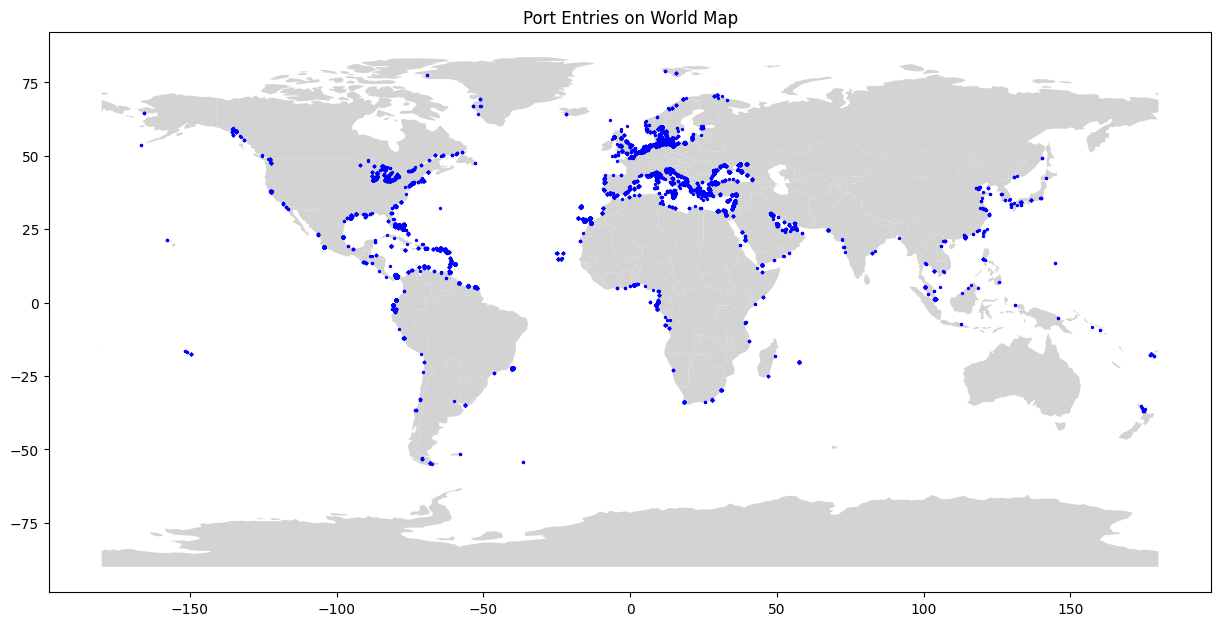

In [18]:

import geopandas as gpd
import matplotlib.pyplot as plt

# Read the dataset and store it in a GeoDataFrame
port_calls = gpd.read_file("port_calls_prod_60_6.csv", encoding='latin1')

# Filter the dataset to include only the necessary columns for visualization
port_entries = port_calls[['latitude', 'longitude']]

# Create a GeoDataFrame from the filtered data
geometry = gpd.points_from_xy(port_entries['longitude'], port_entries['latitude'])
port_entries = gpd.GeoDataFrame(port_entries, geometry=geometry)

# Plot the port entries on a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgray')
port_entries.plot(ax=ax, color='blue', markersize=2)
plt.title("Port Entries on World Map")
plt.show()


* How can we group port calls by ship_type (10 marks?)

Answer -

In [19]:
#grouping the data on the basis, ship_type
grouped_data = port_call.groupby('ship_type').size().reset_index(name='count')
#sorting the dataset in the ascending order.
grouped_data_sorted = grouped_data.sort_values(by='count', ascending=False)

In [20]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)
print(grouped_data_sorted)

                               ship_type  count
12                    General Cargo Ship   5765
29       Trailing Suction Hopper Dredger   3841
13                         Hopper, Motor   1714
24                       Products Tanker   1602
33                                 Yacht   1154
15                         Landing Craft    836
4                         Cement Carrier    805
21       Passenger/Ro-Ro Ship (Vehicles)    774
0                           Bulk Carrier    664
27                 Standby Safety Vessel    623
20                      Passenger/Cruise    600
16                     Livestock Carrier    532
5                        Chemical Tanker    425
25                Research Survey Vessel    283
31               Water Injection Dredger    188
2                 Bunkering Tanker (Oil)    180
10                        Fishing Vessel    120
28                         Supply Tender    119
7                        Deck Cargo Ship    110
1               Bulk Cement Storage Ship

## Preprocessing

* Values Imputation.

In [21]:
from sklearn.impute import SimpleImputer
# Identify the categorical and continuous columns
# Identify the categorical and continuous columns
categorical_columns = port_call_out.select_dtypes(include=['object']).columns
continuous_columns = port_call_out.select_dtypes(exclude=['object']).columns

# Create an instance of SimpleImputer for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Create an instance of SimpleImputer for continuous columns
continuous_imputer = SimpleImputer(strategy='mean')

# Fit the categorical imputer to the data
categorical_imputer.fit(port_call_out[categorical_columns])

# Impute missing values in categorical columns
port_call_out[categorical_columns] = categorical_imputer.transform(port_call_out[categorical_columns])

# Fit the continuous imputer to the data
continuous_imputer.fit(port_call_out[continuous_columns])

# Impute missing values in continuous columns
port_call_out[continuous_columns] = continuous_imputer.transform(port_call_out[continuous_columns])

* Label_encoding.

In [22]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Apply label encoding to each column
encoded_columns = [col + '_encoded' for col in categorical_columns]
port_call_out[encoded_columns] = port_call_out[categorical_columns].apply(encoder.fit_transform)


In [23]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Select categorical columns
categorical_columns = port_call_out.select_dtypes(include='object').columns

# Apply label encoding to categorical columns
port_call_out_encoded = port_call_out[categorical_columns].apply(encoder.fit_transform)

# Concatenate the encoded columns with the original DataFrame
port_call_out_encoded = pd.concat([port_call_out.drop(columns=categorical_columns), port_call_out_encoded], axis=1)


In [24]:
port_call_out_encoded.head()

,imo_number,mmsi,latitude,longitude,hours_in_port,gross_tonnage,length_overall_loa,draught,breadth,ship_name_encoded,ship_status_encoded,ship_type_encoded,flag_name_encoded,entered_encoded,departed_encoded,port_name_encoded,port_country_name_encoded,port_code_encoded,status_encoded,ship_name,ship_status,ship_type,flag_name,entered,departed,port_name,port_country_name,port_code,status
0,1001702.0,373602000.0,37.971436,-0.684088,59.945498,295.0,52.06,4.63,8.57,21,1,30,13,18797,16073,780,104,241,3,21,1,30,13,18797,16073,780,104,241,3
1,1001702.0,373602000.0,38.744904,1.423552,105.700000,295.0,52.06,4.63,8.57,21,1,30,13,18691,18729,400,104,222,0,21,1,30,13,18691,18729,400,104,222,0
2,1001702.0,373602000.0,38.989326,9.023798,16.100000,295.0,52.06,4.63,8.57,21,1,30,13,18491,18457,672,60,455,0,21,1,30,13,18491,18457,672,60,455,0
3,1001702.0,373602000.0,40.696091,14.475155,1.100000,295.0,52.06,4.63,8.57,21,1,30,13,18467,18416,128,60,434,3,21,1,30,13,18467,18416,128,60,434,3
4,1001702.0,373602000.0,40.694996,14.476230,232.000000,295.0,52.06,4.63,8.57,21,1,30,13,18270,18413,128,60,434,3,21,1,30,13,18270,18413,128,60,434,3


In [25]:
port_call_out_encoded.shape

(20400, 29)

* How can we extract train and test dataset from the provided dataset? (5 marks?)

In [26]:
# Train a linear regression model
X = port_call_out_encoded.drop('hours_in_port', axis=1)  # Features
y = port_call_out_encoded['hours_in_port']  # Target variable

In [27]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (16320, 28)
y_train shape: (16320,)
X_test shape: (4080, 28)
y_test shape: (4080,)


* Can we
train a ML model to predict hours_in_port from the provided dataset? (20 marks?)

In [28]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [29]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
lr_rmse = np.sqrt(lr_mse)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_predictions = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
ridge_rmse = np.sqrt(ridge_mse)

# Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
lasso_predictions = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
lasso_rmse = np.sqrt(lasso_mse)

# Random Forest Regression
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)

# Print the evaluation metrics for each model
print("Linear Regression MSE:", lr_mse)
print("Linear Regression R2 Score:", lr_r2)
print("Linear Regression RMSE:", lr_rmse)
print("\n")
print("Ridge Regression MSE:", ridge_mse)
print("Ridge Regression R2 Score:", ridge_r2)
print("Ridge Regression RMSE:", ridge_rmse)
print("\n")
print("Lasso Regression MSE:", lasso_mse)
print("Lasso Regression R2 Score:", lasso_r2)
print("Lasso Regression RMSE:", lasso_rmse)
print("\n")
print("Random Forest Regression MSE:", rf_mse)
print("Random Forest Regression R2 Score:", rf_r2)
print("Random Forest Regression RMSE:", rf_rmse)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.62377e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.931e+08, tolerance: 2.579e+05
  model = cd_fast.enet_coordinate_descent(


Linear Regression MSE: 82683.47671918232
Linear Regression R2 Score: 0.8067968547198925
Linear Regression RMSE: 287.5473469173074


Ridge Regression MSE: 82683.45544956102
Ridge Regression R2 Score: 0.8067969044197587
Ridge Regression RMSE: 287.54730993275007


Lasso Regression MSE: 82849.342883282
Lasso Regression R2 Score: 0.8064092819439139
Lasso Regression RMSE: 287.83561781558933


Random Forest Regression MSE: 406191.6349966476
Random Forest Regression R2 Score: 0.05086838892425094
Random Forest Regression RMSE: 637.3316522789745


* Which
features could be useful in this prediction? (5 marks?)

In [35]:
# Get the coefficients
ridge_coefficients = ridge.coef_

# Create a DataFrame to store the coefficients
ridge_importance_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge_coefficients})

# Sort the DataFrame by absolute coefficient value in descending order
ridge_importance_df['Absolute Coefficient'] = abs(ridge_importance_df['Coefficient'])
ridge_importance_df = ridge_importance_df.sort_values('Absolute Coefficient', ascending=False)

# Print the feature importances
print(ridge_importance_df)

                      Feature   Coefficient  Absolute Coefficient
7                     breadth  1.365982e+01          1.365982e+01
9         ship_status_encoded -5.732801e+00          5.732801e+00
19                ship_status -5.732801e+00          5.732801e+00
6                     draught  3.424944e+00          3.424944e+00
5          length_overall_loa -1.980878e+00          1.980878e+00
27                     status  1.974803e+00          1.974803e+00
17             status_encoded  1.974803e+00          1.974803e+00
11          flag_name_encoded  8.044432e-01          8.044432e-01
21                  flag_name  8.044432e-01          8.044432e-01
2                    latitude -5.302159e-01          5.302159e-01
23                   departed  4.967434e-01          4.967434e-01
13           departed_encoded  4.967094e-01          4.967094e-01
22                    entered -4.952723e-01          4.952723e-01
12            entered_encoded -4.951686e-01          4.951686e-01
15  port_c

In [37]:
# Get the feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to store the feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(importance_df)

                      Feature  Importance
2                    latitude    0.142583
3                   longitude    0.117605
12            entered_encoded    0.100973
22                    entered    0.100034
1                        mmsi    0.079267
13           departed_encoded    0.073530
24                  port_name    0.066953
23                   departed    0.064370
14          port_name_encoded    0.052750
20                  ship_type    0.028478
10          ship_type_encoded    0.020560
8           ship_name_encoded    0.016125
26                  port_code    0.015700
18                  ship_name    0.014802
7                     breadth    0.014791
16          port_code_encoded    0.012884
0                  imo_number    0.012879
27                     status    0.009886
6                     draught    0.008249
15  port_country_name_encoded    0.007912
5          length_overall_loa    0.007336
17             status_encoded    0.006648
19                ship_status    0

How we can cluster/group ships ports in following bins:
1. Hours_in_port < 6 hours
2. Hours_in_port in between 6 and 12 hours
3. Hours_in_port in between 12 and 24 hours
4. Hours_in_port > 24 hours

In [31]:
import pandas as pd
from sklearn.cluster import KMeans


# Extract the 'Hours_in_port' column
hours_in_port = port_call_out_encoded['hours_in_port'].values.reshape(-1, 1)

# Define the number of clusters
num_clusters = 4

# Create an instance of KMeans clustering algorithm
kmeans = KMeans(n_clusters=num_clusters)

# Fit the data to the KMeans model
kmeans.fit(hours_in_port)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the dataset
port_call_out_encoded['Cluster'] = labels

# Map the cluster labels to the corresponding bins
port_call_out_encoded['Cluster'] = port_call_out_encoded['Cluster'].map({
    0: 'Hours_in_port < 6 hours',
    1: 'Hours_in_port in between 6 and 12 hours',
    2: 'Hours_in_port in between 12 and 24 hours',
    3: 'Hours_in_port > 24 hours'
})

# Print the clusters/groups
print(port_call_out_encoded['Cluster'].value_counts())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hours_in_port < 6 hours                     20195
Hours_in_port > 24 hours                      163
Hours_in_port in between 6 and 12 hours        34
Hours_in_port in between 12 and 24 hours        8
Name: Cluster, dtype: int64


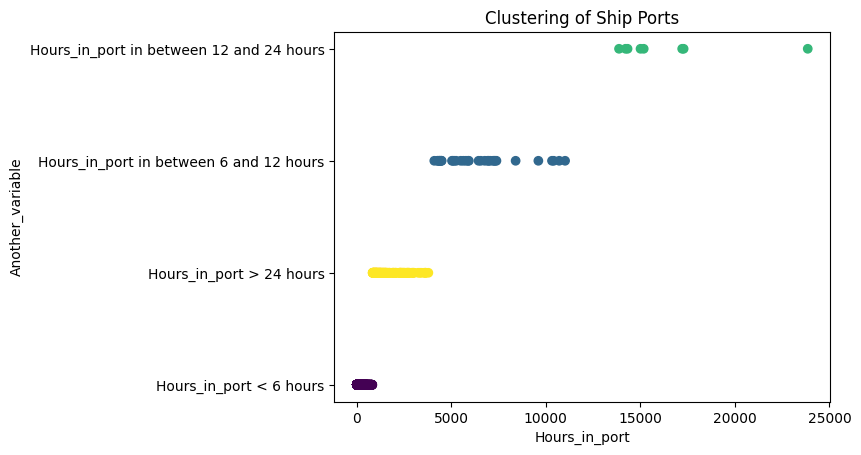

In [33]:
# Visualize the clusters
plt.scatter(port_call_out_encoded['hours_in_port'], port_call_out_encoded['Cluster'], c=labels, cmap='viridis')
plt.xlabel('Hours_in_port')
plt.ylabel('Another_variable')
plt.title('Clustering of Ship Ports')
plt.show()

## Position Data

* Find the interactions within the dataset. Explain how you work on the question and how you get the
result. (70%)

In [38]:
import pandas as pd

# Load the dataset
df = pd.read_csv("ships-near-gb-202304.csv")


In [40]:
# Display the first few record
df.head()

,MMSI,NavigationalStatus,timestamp,latitude,longitude,speed,course
0,232013113,Not defined,1681257702,59.902270,-1.441542,10.114286,157.114286
1,232013113,Not defined,1681258260,59.875649,-1.416785,10.650000,150.983330
2,232013113,Not defined,1681258892,59.850300,-1.383423,10.760000,144.079999
3,232013113,Not defined,1681259458,59.832214,-1.345992,10.971429,119.328573
4,232013113,Not defined,1681260105,59.821868,-1.287544,10.833333,100.983334


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2502 entries, 0 to 2501
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MMSI                2502 non-null   int64  
 1   NavigationalStatus  2502 non-null   object 
 2   timestamp           2502 non-null   int64  
 3   latitude            2502 non-null   float64
 4   longitude           2502 non-null   float64
 5   speed               2502 non-null   float64
 6   course              2502 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 137.0+ KB


In [42]:
df.isnull().sum()

MMSI                  0
NavigationalStatus    0
timestamp             0
latitude              0
longitude             0
speed                 0
course                0
dtype: int64

One way to identify interactions is by defining a distance threshold and time window. For example, if two ships' positions are within a certain distance of each other and their timestamps are close, it can be considered an interaction.

Here's a general outline of the steps to identify ship-to-ship interactions:

Iterate over each ship in the dataset.
For each ship, iterate over the remaining ships.
Calculate the distance between the two ships' latitude and longitude coordinates using a suitable distance metric (e.g., Haversine formula).
Check if the distance is below the defined threshold.
Check if the timestamps of the two ships' positions are within the defined time window.
If both conditions are met, consider it as a ship-to-ship interaction.

Once the ship-to-ship interactions are identified, It can  be analyzed the data further to gain insights or perform additional tasks as required by the analysis.

In [45]:
import pandas as pd
from geopy.distance import geodesic
from datetime import timedelta

# Load the dataset
df = pd.read_csv("ships-near-gb-202304.csv")

# Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Define distance threshold (in kilometers) and time window (in minutes)
distance_threshold = 5  # Example distance threshold
time_window = 30  # Example time window

# Create a DataFrame to store ship-to-ship interactions
interactions_df = pd.DataFrame(columns=['Ship1', 'Ship2', 'InteractionTime', 'Distance'])

# Iterate over each ship
for ship_id, ship_data in df.groupby('MMSI'):
    # Sort ship data by timestamp
    ship_data = ship_data.sort_values('timestamp')

    # Iterate over the remaining ships
    for other_ship_id, other_ship_data in df.groupby('MMSI'):
        if other_ship_id != ship_id:
            # Iterate over ship positions
            for _, ship_position in ship_data.iterrows():
                # Get the most recent position of the other ship
                other_ship_position = other_ship_data.iloc[-1]

                # Calculate distance between ship positions
                distance = calculate_distance((ship_position['latitude'], ship_position['longitude']),
                                                  (other_ship_position['latitude'], other_ship_position['longitude']))

                # Check if distance is below threshold
                if distance <= distance_threshold:
                    # Store ship-to-ship interaction
                    interaction = {
                        'Ship1': ship_id,
                        'Ship2': other_ship_id,
                        'InteractionTime': ship_position['timestamp'],
                        'Distance': distance
                    }
                    interactions_df = interactions_df.append(interaction, ignore_index=True)


<ipython-input-45-bd07bccb192b>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interactions_df = interactions_df.append(interaction, ignore_index=True)
<ipython-input-45-bd07bccb192b>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interactions_df = interactions_df.append(interaction, ignore_index=True)
<ipython-input-45-bd07bccb192b>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interactions_df = interactions_df.append(interaction, ignore_index=True)
<ipython-input-45-bd07bccb192b>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interactions_df = interactions_df.append(interaction, ignore_index=True)
<ipython-input-45-bd07bc

In [46]:
# Display the ship-to-ship interactions
print(interactions_df)

         Ship1      Ship2               InteractionTime  Distance
0    232012297  235067397 1970-01-01 00:00:01.681281191  0.006262
1    232012297  235067397 1970-01-01 00:00:01.681281910  0.006237
2    232012297  235067397 1970-01-01 00:00:01.681282881  0.005869
3    232012297  235067397 1970-01-01 00:00:01.681283510  0.005247
4    232012297  235067397 1970-01-01 00:00:01.681284814  0.007009
5    232012297  235067397 1970-01-01 00:00:01.681286357  0.004764
6    232012297  235067397 1970-01-01 00:00:01.681286456  0.003791
7    232012297  235067397 1970-01-01 00:00:01.681287410  0.004935
8    232012297  235067397 1970-01-01 00:00:01.681287762  0.138474
9    232012297  235067397 1970-01-01 00:00:01.681288440  0.935841
10   232012297  235067397 1970-01-01 00:00:01.681290245  0.885604
11   232012297  235067397 1970-01-01 00:00:01.681292053  0.886564
12   232012297  235067397 1970-01-01 00:00:01.681293857  0.886564
13   232012297  235067397 1970-01-01 00:00:01.681294688  0.886564
14   23201

This output can be used to identify potential STS transfers. For example, if two ships are within a certain distance of each other for a period of time, it is possible that they are transferring goods.

Here are some additional things to note about the output:

The timestamp is in the UTC time zone.
The distance is in kilometers.
The output is sorted by timestamp.

* What would you need to build a model to detect STS transfers? (15%)

Sure, here are the features that would need to build a model to detect STS transfers:

* **MMSI:** The Maritime Mobile Service Identity (MMSI) is a unique identifier for each ship. This can be used to track the movements of individual ships over time.
* **NavigationalStatus:** The NavigationalStatus field indicates the current state of the ship. For example, a ship that is "AtAnchor" is not likely to be involved in an STS transfer, while a ship that is "Underway" is more likely to be involved.
* **Timestamp:** The timestamp field indicates the time at which the data was recorded. This can be used to track the movements of ships over time and to identify potential STS transfers.
* **Latitude:** The latitude field indicates the ship's position on the Earth's surface. This can be used to track the movements of ships over time and to identify potential STS transfers.
* **Longitude:** The longitude field indicates the ship's position on the Earth's surface. This can be used to track the movements of ships over time and to identify potential STS transfers.
* **Speed:** The speed field indicates the ship's speed in knots. This can be used to identify ships that are moving slowly, which are more likely to be involved in STS transfers.
* **Course:** The course field indicates the ship's direction of travel. This can be used to identify ships that are moving towards each other, which are more likely to be involved in STS transfers.

In addition to these features, we may also want to consider using other features, such as the size of the ships, the type of cargo that they are carrying, and the weather conditions. The specific features that we use will depend on the specific data that we have available and the goals of your model.

Once we have identified the features that we want to use, we can then build a model to detect STS transfers. There are a number of different machine learning algorithms that we could use, such as decision trees, random forests, or support vector machines. The specific algorithm that we use will depend on the specific features that we have available and the goals of your model.

Once we have built your model, we can then use it to predict whether or not a particular interaction between two ships is an STS transfer. You can then use this information to monitor shipping activity and to identify potential STS transfers.

* What further steps would be required to detect transfers in real time from a stream of positions
(15%)

To detect transfers in real time from a stream of positions, the following further steps would be required:

1. Real-Time Data Streaming: Set up a system to receive and process a continuous stream of ship positions in real time. This could involve integrating with data sources such as AIS (Automatic Identification System) receivers or other tracking systems that provide ship position updates.

2. Feature Engineering: Extract relevant features from the real-time position data that can capture the characteristics of STS transfers. This may include the same features mentioned before, such as ship proximity, changes in speed and course, and the relative positions of ships over time.

3. Data Preprocessing: Apply necessary preprocessing steps to the incoming real-time data, such as handling missing values, normalizing or scaling features, and encoding categorical variables. Ensure that the preprocessing steps align with the preprocessing done during the model training phase.

4. Model Deployment: Deploy the trained model on a real-time data processing system, such as a stream processing framework or a cloud-based service. This involves integrating the model into the system and configuring it to continuously process the incoming ship position data.

5. Real-Time Prediction: Apply the trained model to make predictions on the real-time ship position data. This involves feeding the current ship positions into the model and obtaining predictions for each position update.

6. Threshold Setting: Define appropriate thresholds or criteria to determine when an STS transfer is detected based on the model predictions. This could be based on certain conditions, such as the duration of the interaction, the proximity of ships, or changes in speed and course.

7. Alerting and Reporting: Set up a mechanism to generate alerts or notifications when an STS transfer is detected in real time. This could involve sending notifications to relevant stakeholders, triggering automated actions, or logging the detected transfers for further analysis or reporting.

8. Monitoring and Maintenance: Continuously monitor the performance of the real-time detection system, including the accuracy and reliability of the predictions. Regularly assess the model's performance, update the model if necessary, and fine-tune the system to ensure optimal detection of STS transfers.

It is important to note that real-time detection of STS transfers can be challenging due to the need for timely processing and handling of large volumes of streaming data. Therefore, considerations such as system scalability, computational resources, and efficient algorithms are crucial in implementing an effective real-time STS detection solution.